In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [24]:
X1 = np.random.multivariate_normal([3, 5], [[1, 0.1], [0.1, 1]], 100)

In [25]:
X2 = np.random.multivariate_normal([12, 3], [[12, 0.1], [0.1, 1]], 100)

In [26]:
X = np.concatenate((X1, X2))

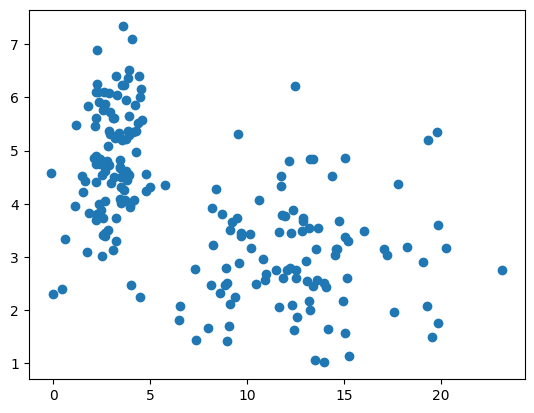

In [27]:
plt.scatter(X[:, 0], X[:, 1])

In [28]:
x_extent = 0, 20
y_extent = 0, 8
xs = np.linspace(*x_extent, 101)
ys = np.linspace(*y_extent, 101)
xx, yy = np.meshgrid(xs, ys)
mg = np.dstack((xx, yy))
densities = multivariate_normal.pdf(mg, mu_a, cov_a)

NameError: name 'mu_a' is not defined

In [29]:
np.dstack((xx, yy)).shape

(101, 101, 2)

In [30]:
da = multivariate_normal.pdf(np.dstack((xx, yy)), [3, 5], [[1, 0.1], [0.1, 1]])

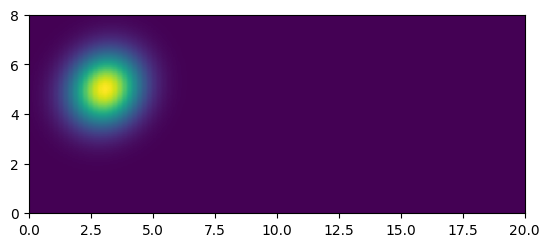

In [31]:
plt.imshow(da / da.max(), extent=(0, 20, 0, 8), origin='lower')

In [32]:
plt.imshow(im/im.max())

NameError: name 'im' is not defined

In [33]:
# E-M algorithm
import numpy as np

e_m_steps = 20
n_clusters = 2
prior = np.ones(n_clusters) / n_clusters
mu_a = np.array([1,2])
mu_b = np.array([7, 10])
cov_a = np.array([[11,0],[0,12]])
cov_b = np.array([[11,0],[0,12]])

# For visualizing clusters
x_extent = 0, 20
y_extent = 0, 8
grid_num = 101

N, d = X.shape

In [34]:
im = np.zeros((grid_num, grid_num, e_m_steps, 3))

In [35]:
for i in range(e_m_steps):
    print(f"mu_a: {mu_a}, mu_b: {mu_b}")
    # Visualize clusters
    xs = np.linspace(*x_extent, 101)
    ys = np.linspace(*y_extent, 101)
    xx, yy = np.meshgrid(xs, ys)
    mg = np.dstack((xx, yy))
    densities_a = multivariate_normal.pdf(mg, mu_a, cov_a)
    densities_b = multivariate_normal.pdf(mg, mu_b, cov_b)
    im[:, :, i, 0] = densities_a / densities_a.max()
    im[:, :, i, 1] = densities_b / densities_b.max()
    
    densities_a = multivariate_normal.pdf(X, mu_a, cov_a) # Probability x_i given cluster a
    densities_b = multivariate_normal.pdf(X, mu_b, cov_b)

    posterior_a = densities_a * prior[0] / (densities_a * prior[0] + densities_b * prior[1]) # Probability cluster a given x_i
    posterior_b = 1 - posterior_a

    mu_a = (np.expand_dims(posterior_a, 1) * X).sum(axis=0) / posterior_a.sum()
    mu_b = (np.expand_dims(posterior_b, 1) * X).sum(axis=0) / posterior_b.sum()

    cov_a = np.zeros((n_clusters, n_clusters))

    x_diff_a = X - mu_a
    x_diff_b = X - mu_b

    t_a = posterior_a / (N * prior[0])
    t_b = posterior_b / (N * prior[1])

    cov_a = (np.expand_dims(t_a, 1) * x_diff_a).T @ x_diff_a
    cov_b = (np.expand_dims(t_b, 1) * x_diff_b).T @ x_diff_b

mu_a: [1 2], mu_b: [ 7 10]
mu_a: [3.90880813 4.28834463], mu_b: [10.97807116  3.64940184]
mu_a: [3.60962678 4.48619548], mu_b: [11.5818352   3.43630661]
mu_a: [3.25375449 4.70267188], mu_b: [12.00118945  3.22030419]
mu_a: [3.05653579 4.8447854 ], mu_b: [12.24244798  3.0751295 ]
mu_a: [3.02071967 4.8768825 ], mu_b: [12.32221773  3.03534305]
mu_a: [3.00975552 4.88090576], mu_b: [12.34191511  3.02964443]
mu_a: [3.00609176 4.87965002], mu_b: [12.35538342  3.02890192]
mu_a: [3.00450477 4.87799596], mu_b: [12.36604356  3.02871077]
mu_a: [3.00366266 4.87666662], mu_b: [12.37417364  3.02856541]
mu_a: [3.00315786 4.87568125], mu_b: [12.38019298  3.02843904]
mu_a: [3.00283404 4.87496731], mu_b: [12.38457027  3.02833782]
mu_a: [3.00261857 4.87445532], mu_b: [12.38771763  3.0282612 ]
mu_a: [3.00247233 4.87409049], mu_b: [12.3899638   3.02820495]
mu_a: [3.00237194 4.87383167], mu_b: [12.39155865  3.02816433]
mu_a: [3.00230255 4.87364863], mu_b: [12.39268707  3.0281353 ]
mu_a: [3.00225436 4.87351949

In [36]:
print(cov_a)

[[0.99960013 0.31562517]
 [0.31562517 1.05625087]]


In [37]:
print(cov_b)

[[14.91449734  0.23259146]
 [ 0.23259146  1.07431921]]


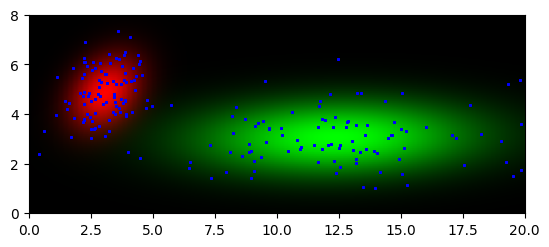

In [41]:
for i in range(e_m_steps):
    plt.scatter(X[:, 0], X[:, 1], c='blue', s=0.3)
    plt.imshow(im[:, :, i, :]/im[:,:,i,:].max(), extent=(*x_extent, *y_extent), origin='lower')
    plt.xlim(*x_extent)
    plt.ylim(*y_extent)
    plt.savefig(f"e_m_{i}.png")

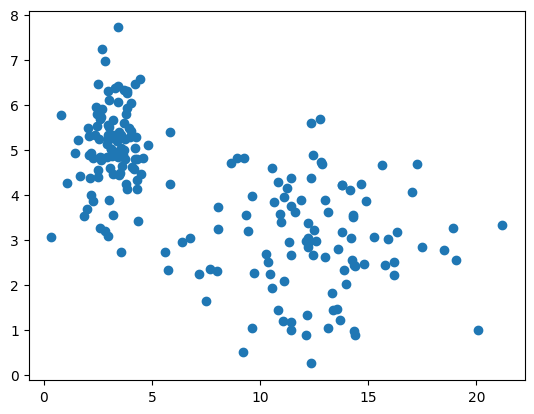

In [77]:
plt.scatter(X[:,0],X[:,1])